<a href="https://colab.research.google.com/github/Juanjdurillo/Juanjdurillo.github.io/blob/master/LeNet_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D,Flatten, Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils 
import tensorflow as tf


Using TensorFlow backend.


In [2]:
model = Sequential()

In [3]:
# First Convolutional Layer (depth = 6 and filter size = 5x5)
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh', input_shape = (28,28,1), padding='same'))

In [4]:
# First Pooling layer
model.add(AveragePooling2D(pool_size=2,strides=2, padding='valid'))

In [5]:
# Second Convolutional Layer (depth = 16 filter size = 5x5)
model.add(Conv2D(filters=16,kernel_size=5,strides=1,activation='tanh',padding='valid'))

In [6]:
# Second Pooling layer
model.add(AveragePooling2D(pool_size=2,strides=2,padding='valid'))

In [7]:
# Third Convolutional Layer (depth = 120 and filter size= 5x5)
model.add(Conv2D(filters=120,kernel_size=5,strides=1,activation='tanh',padding='valid'))

In [8]:
# Next layer is a fully conneted NN, so we need flattering the output of the previous layer
model.add(Flatten())

In [9]:
# First Layer of the fully connected neural network for classification
model.add(Dense(units=84, activation='tanh'))

In [10]:
# Secon layer of the fully connected neurla network (the output of the whole network)
model.add(Dense(units=10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

In [12]:
def lr_schedule(epoch):
  lr = 5e-4
  if epoch >  2:
    lr = 2e-4
  elif epoch > 5:
    lr = 5e-5
  elif epoch > 9:
    lr = 1e-5
  return lr

In [13]:
opt=SGD(lr=lr_schedule(0))
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [14]:
 (x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
print(x_train.shape)

(60000, 28, 28)


In [16]:
# input image dimensions 28x28 pixel images. 
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('image input shape: ', input_shape)
print('x_train shape:', x_train.shape)

# one-hot encode the labels
# convert class vectors to binary class matrices
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

image input shape:  (28, 28, 1)
x_train shape: (60000, 28, 28, 1)


In [17]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), verbose=2, shuffle=True)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 39s - loss: 1.8234 - accuracy: 0.6160 - val_loss: 1.3061 - val_accuracy: 0.7940
Epoch 2/20
 - 39s - loss: 0.9802 - accuracy: 0.8238 - val_loss: 0.7358 - val_accuracy: 0.8613
Epoch 3/20
 - 40s - loss: 0.6408 - accuracy: 0.8688 - val_loss: 0.5367 - val_accuracy: 0.8912
Epoch 4/20
 - 40s - loss: 0.5006 - accuracy: 0.8907 - val_loss: 0.4349 - val_accuracy: 0.9060
Epoch 5/20
 - 40s - loss: 0.4204 - accuracy: 0.9040 - val_loss: 0.3705 - val_accuracy: 0.9176
Epoch 6/20
 - 40s - loss: 0.3660 - accuracy: 0.9137 - val_loss: 0.3248 - val_accuracy: 0.9272
Epoch 7/20
 - 40s - loss: 0.3259 - accuracy: 0.9215 - val_loss: 0.2906 - val_accuracy: 0.9344
Epoch 8/20
 - 40s - loss: 0.2952 - accuracy: 0.9274 - val_loss: 0.2647 - val_accuracy: 0.9382
Epoch 9/20
 - 40s - loss: 0.2707 - accuracy: 0.9326 - val_loss: 0.2429 - val_accuracy: 0.9422
Epoch 10/20
 - 40s - loss: 0.2504 - accuracy: 0.9374 - val_loss: 0.2253 - val_accuracy: 0.9456
Epoch 11/

In [19]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

In [21]:
epochs = range(1, len(acc)+ 1)
print(epochs)

range(1, 21)


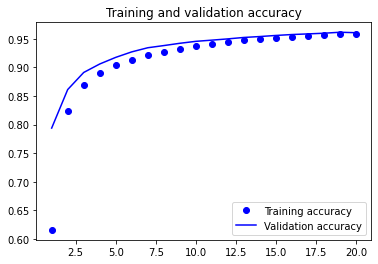

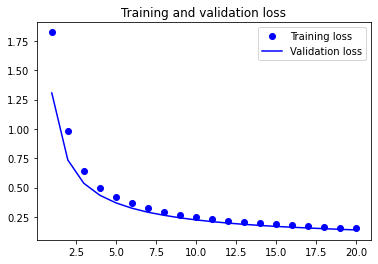

In [28]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

TypeError: ignored

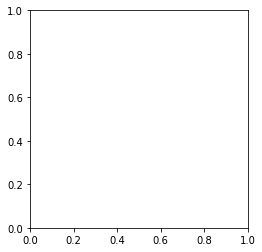

In [62]:
from keras.preprocessing import image
test_index = 124
#plt.imshow(image.array_to_img(x_test[test_index]))
plt.imshow(x_test[test_index])
test_score = model.predict(x_test[test_index:test_index+1])
prediction = tf.argmax(test_score[0])
print(prediction)

In [52]:
test_score = model.evaluate(x_test[1])